In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [43]:
#Load image
img = cv2.imread('images/Incredible.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

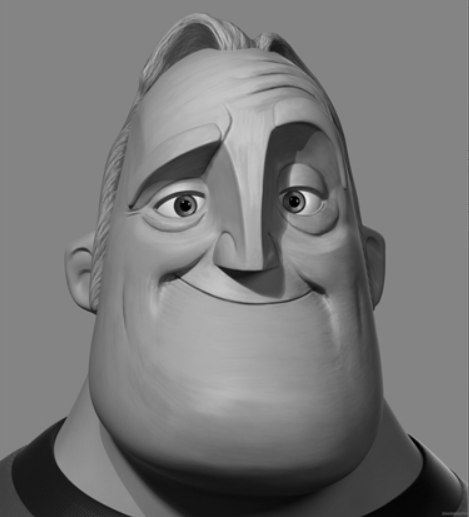

In [4]:
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contoured = cv2.drawContours(img, contours, -1, (0,255,0), 2)
cv2.imshow('img', img_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

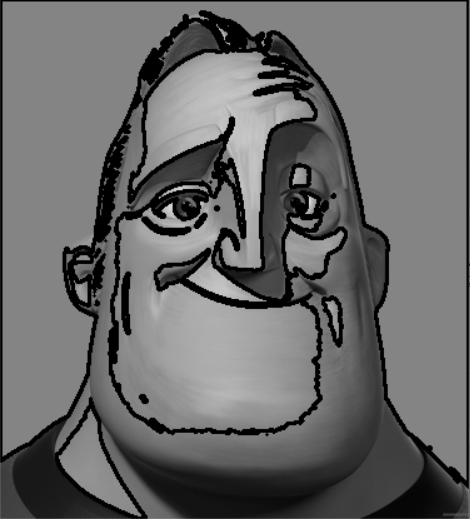

In [15]:
max_contours_point = []
for contour in contours:
    max_contours_point.append((contour, len(contour)))
biggest_cont = sorted(max_contours_point,key=lambda x: x[1], reverse= True)
print(f'Biggest contours : {biggest_cont[0][1], biggest_cont[1][1], biggest_cont[2][1]}')

Biggest contours : (1395, 181, 140)


In [16]:
big_and_convex = cv2.convexHull(biggest_cont[0][0])
convex_contoured = cv2.drawContours(img, [big_and_convex], 0, (0,255,0), 3)
cv2.imshow('img', convex_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

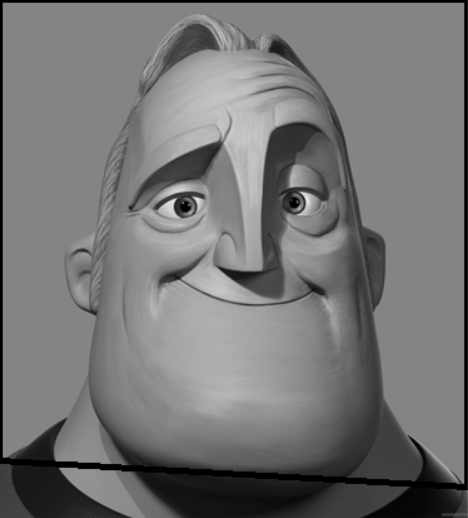

In [17]:
hull = cv2.convexHull(biggest_cont[0][0], returnPoints=False)
convexityDefects = cv2.convexityDefects(biggest_cont[0][0], hull)

In [19]:
for i in range(convexityDefects.shape[0]):
    s,e,f,d = convexityDefects[i,0]
    start = tuple(biggest_cont[0][0][s][0])
    end = tuple(biggest_cont[0][0][e][0])
    far = tuple(biggest_cont[0][0][f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

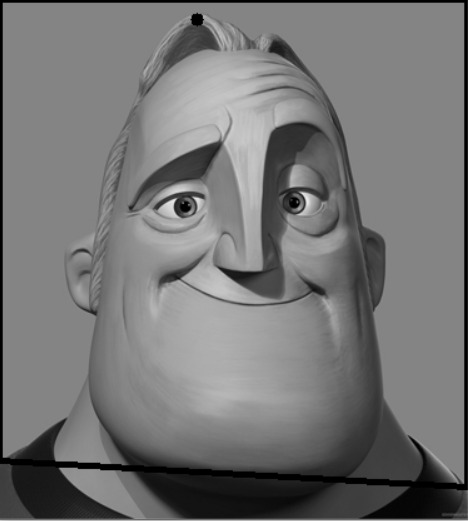

# Aproximation CHAIN_APPROX_TC89_L1

In [23]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
cv2.drawContours(img, contours, -1, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

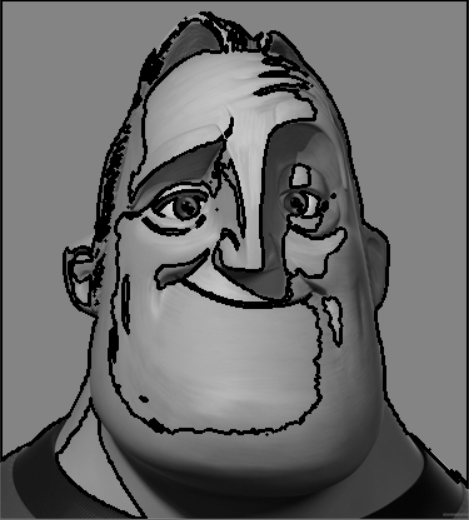

In [24]:
def conv(img, contours):
    max_contours_point = []
    for contour in contours:
        max_contours_point.append((contour, len(contour)))
    biggest_cont = sorted(max_contours_point,key=lambda x: x[1], reverse= True)
    print(f'Biggest contour : {biggest_cont[0][1], biggest_cont[1][1], biggest_cont[2][1]}')
    big_and_convex = cv2.convexHull(biggest_cont[0][0])
    convex_contoured = cv2.drawContours(img, [big_and_convex], 0, (0,255,0), 3)
    return biggest_cont, big_and_convex, convex_contoured

In [30]:
biggest_cont, big_and_convex, convex_contoured = conv(img, contours)

Контуры наибольших размеров : (649, 83, 59)


In [31]:
cv2.imshow('img', convex_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

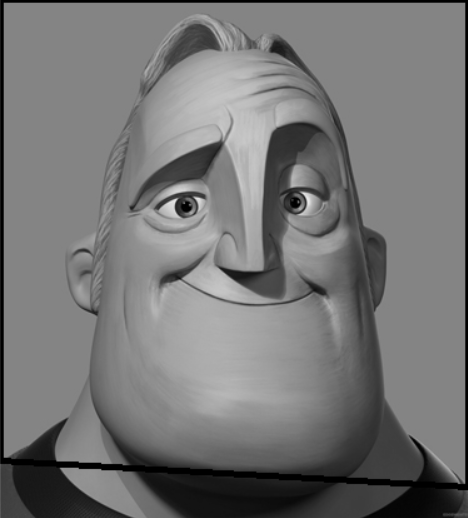

In [32]:
def hull(biggest_cont, img):
    hull = cv2.convexHull(biggest_cont[0][0], returnPoints=False)
    convexityDefects = cv2.convexityDefects(biggest_cont[0][0], hull)
    for i in range(convexityDefects.shape[0]):
        s,e,f,d = convexityDefects[i,0]
        start = tuple(biggest_cont[0][0][s][0])
        end = tuple(biggest_cont[0][0][e][0])
        far = tuple(biggest_cont[0][0][f][0])
        cv2.line(img,start,end,[0,255,0],2)
        cv2.circle(img,far,5,[0,0,255],-1)
    return img

In [33]:
img = hull(biggest_cont, img)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

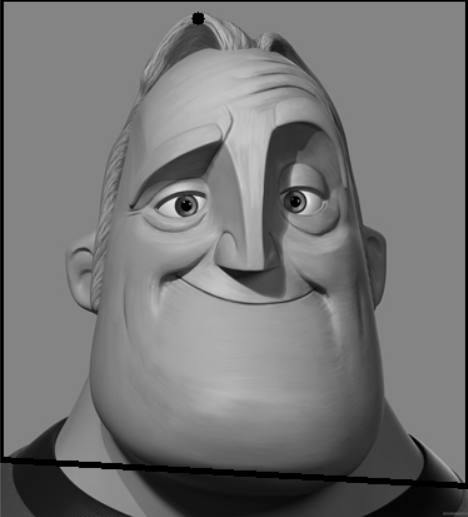

# Aproximation CHAIN_APPROX_TC89_KCOS

In [36]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)
cv2.drawContours(img, contours, -1, (0,255,0), 2)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

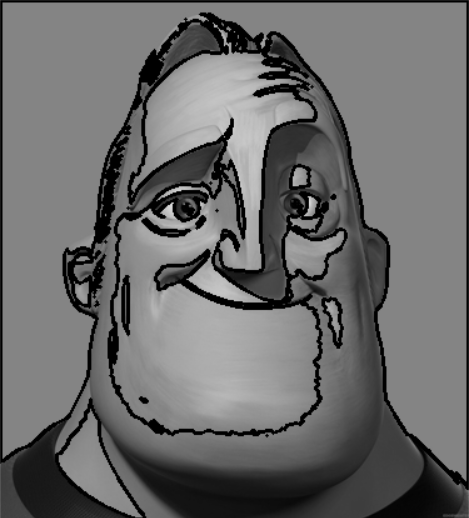

In [39]:
biggest_cont, big_and_convex, convex_contoured = conv(img, contours)

Контуры наибольших размеров : (582, 89, 45)


In [40]:
cv2.imshow('img', convex_contoured)
cv2.waitKey(0)
cv2.destroyAllWindows()

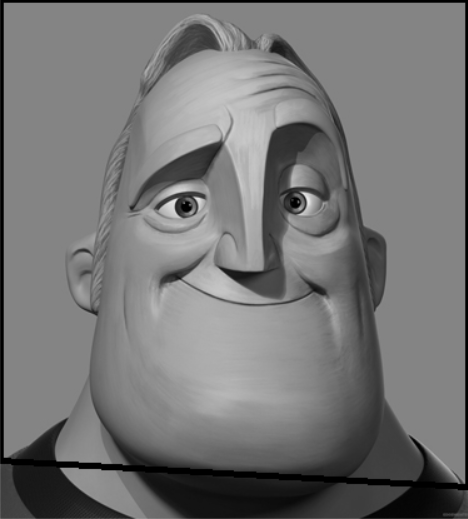

In [41]:
img = hull(biggest_cont, img)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

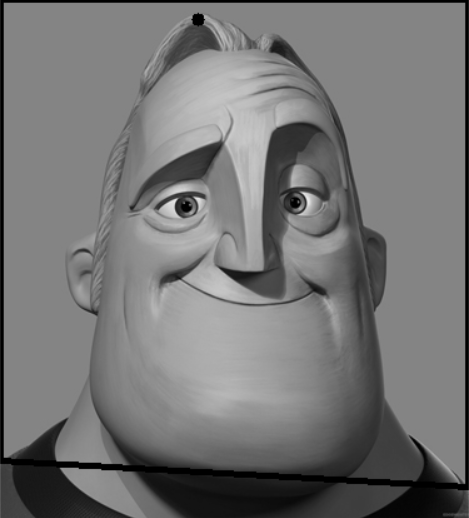